# 5.6.1 Transformaciones con kernels y kernel trick

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np


import warnings
warnings.filterwarnings("ignore")

Estas metodologías permiten transformar el espacio de entrada (las características) a un espacio no lineal, con el fin de hacer el problema tratable por las metodologías disponibles.

En el siguiente ejemplo, las dos clases no son linealmente separables. Mediante la transformación a un espacio dimensional mayor:

$$ (x_1,x_2) -> →(x_1,x_2,x_1^2+x_2^2) $$

las clases se hacen linealmente separables. Note que explicitamente se están computando nuevas columnas en el dataset cuando se agrega la nueva columna $x_1^2+x_2^2$.

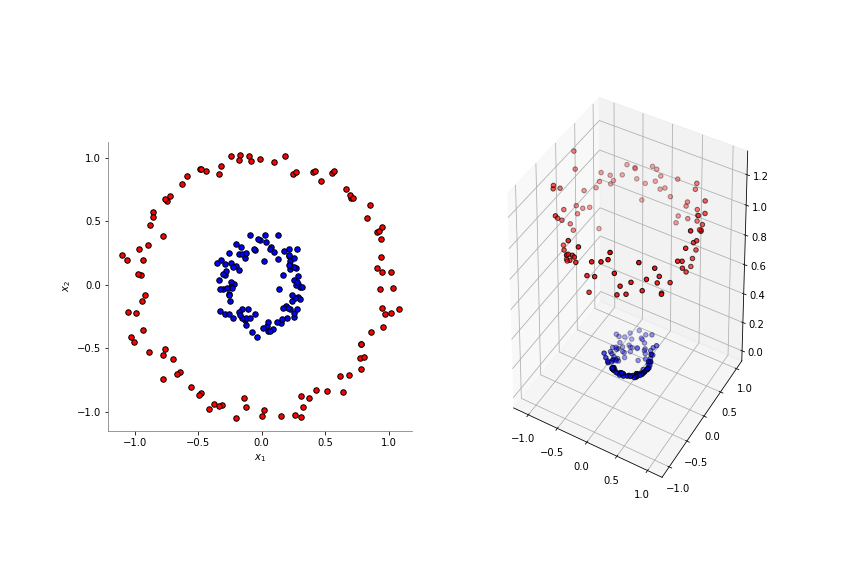

Desde el punto de vista conceptual, existe un número infinito de transformaciones que podrían aumentar la dimensionalidad de los datos, pero muchas de ellas son imprácticas y costosas computacionalmente.

En los métodos de kernel, se soluciona este problema al representar los datos con una matriz $K$ de $n×n$ (donde $n$ es la cantidad de ejemplos del dataset), donde el elemento $k_{ij}$ corresponde a una comparación de la similitud entre los ejemplos (o patrones) $x_i$ y $x_j$. Esto se conoce con el nombre de kernel trick.

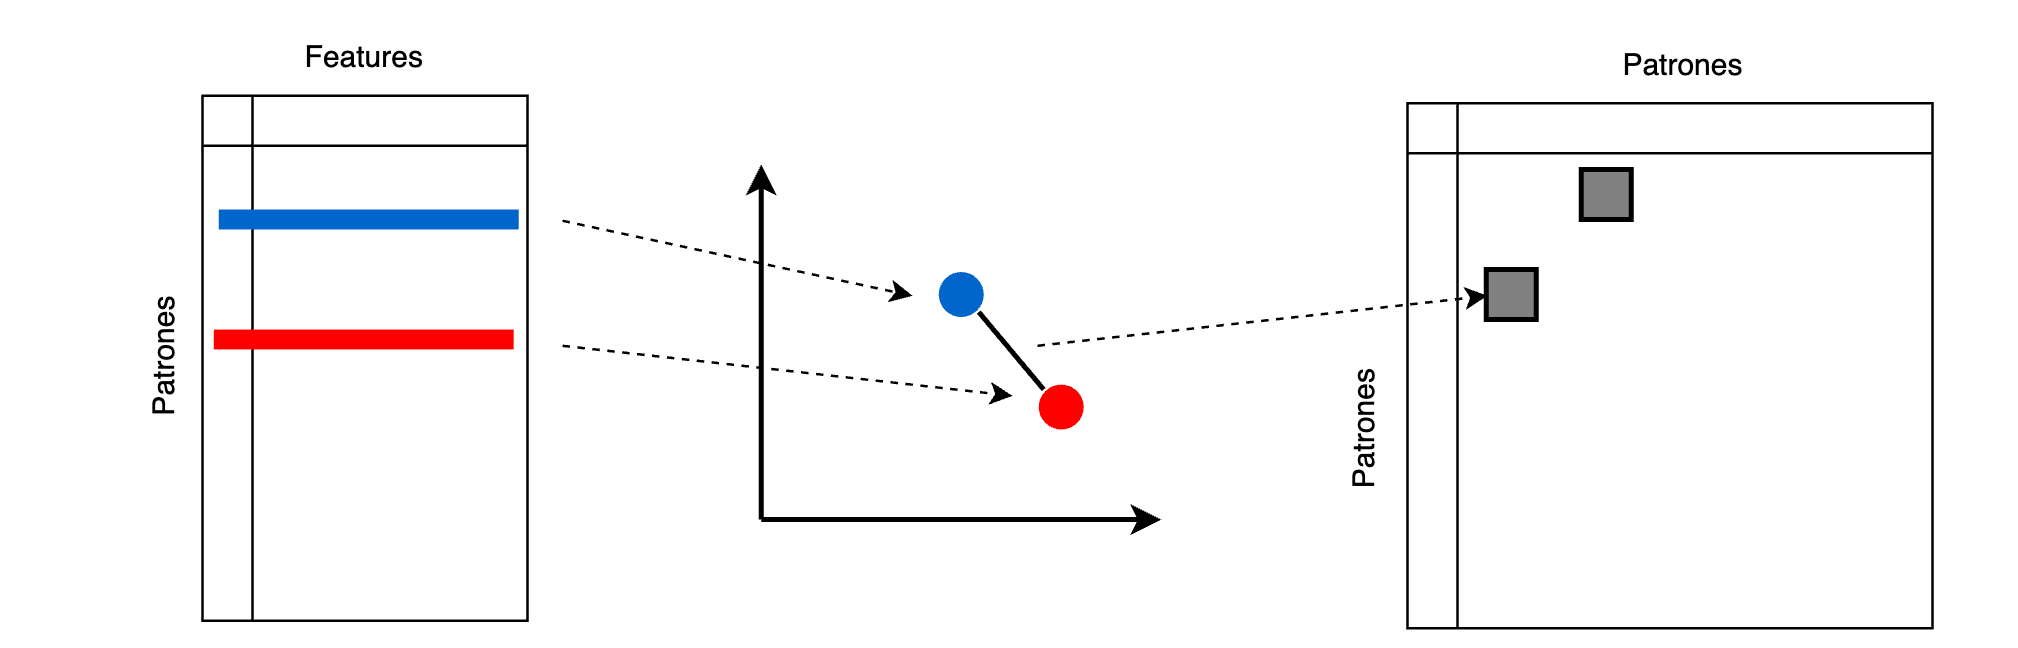

In [ ]:
print('ok_')